In [1]:
library(readr) # for importing the datafile
library(afex) # for the anova
library(tidyverse) # for restructuring it
library(rstatix) # for testing assumptions
library(ggpubr) # for graphical test of normality
library(emmeans) # for post-hoc tests


Loading required package: lme4

Loading required package: Matrix

************
Welcome to afex. For support visit: http://afex.singmann.science/

- Functions for ANOVAs: aov_car(), aov_ez(), and aov_4()
- Methods for calculating p-values with mixed(): 'S', 'KR', 'LRT', and 'PB'
- 'afex_aov' and 'mixed' objects can be passed to emmeans() for follow-up tests
- NEWS: emmeans() for ANOVA models now uses model = 'multivariate' as default.
- Get and set global package options with: afex_options()
- Set orthogonal sum-to-zero contrasts globally: set_sum_contrasts()
- For example analyses see: browseVignettes("afex")
************


Attaching package: ‘afex’


The following object is masked from ‘package:lme4’:

    lmer


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ dplyr   1.0.7
✔ tibble  3.1.6     ✔ stringr 1.4.0
✔ tidyr   1.2.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyvers

In [2]:
d_long <- read.csv("eda/eda_complete_baseline.tsv", sep="\t")
names(d_long)[names(d_long) == "eda"] 
d_long


[1] "eda"

prob_id,time,eda,run,phase,repetition,trial_type,condition,age,sex,group
<int>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>
2,0,-0.478,1,-1,0,pause,pause,26,F,Musik
3,0,0.312,1,-1,0,pause,pause,23,M,Musik
5,0,-2.526,1,-1,0,pause,pause,25,M,Musik
9,0,2.859,1,-1,0,pause,pause,30,M,Sound
11,0,-0.035,1,-1,0,pause,pause,23,F,Musik
12,0,-1.822,1,-1,0,pause,pause,21,F,Sound
13,0,7.210,1,-1,0,pause,pause,22,F,Sound
14,0,1.827,1,-1,0,pause,pause,23,F,Musik
15,0,-5.524,1,-1,0,pause,pause,23,F,Sound


In [3]:
d_long$type <- as.factor(d_long$trial_type)
d_long$condition <- as.factor(d_long$condition)
d_long$group <- as.factor(d_long$group)
d_long$sex <- as.factor(d_long$sex)
d_long$eda <- as.numeric(d_long$eda)
d_long$time<- as.factor(paste(d_long$run, d_long$repetition, sep = "_"))

# bad data structure. See what happens if I eliminate all rows that are "pause" in "condition"

d_long_new <- d_long[d_long$condition != "pause", ] 

In [22]:
#round(eda)
#apply(is.na(d_long_new), 2, which)

In [11]:
which(is.na(d_long_new), arr.ind = TRUE)
d_long_new = na.omit(d_long_new)

row,col


In [12]:
summary(d_long_new)

    prob_id       time           eda               run          phase     
 Min.   : 2.00   1_0:   0   Min.   :-7.8820   Min.   :1.0   Min.   :0.00  
 1st Qu.:12.00   1_1:5192   1st Qu.:-0.9980   1st Qu.:1.0   1st Qu.:1.75  
 Median :18.00   1_2:5192   Median : 0.0260   Median :1.5   Median :3.50  
 Mean   :17.32   2_0:   0   Mean   : 0.1053   Mean   :1.5   Mean   :3.50  
 3rd Qu.:24.00   2_1:5192   3rd Qu.: 1.1293   3rd Qu.:2.0   3rd Qu.:5.25  
 Max.   :29.00   2_2:5192   Max.   :11.8530   Max.   :2.0   Max.   :7.00  
   repetition   trial_type           condition          age        sex      
 Min.   :1.0   Length:20768       math    :10384   Min.   :21.00   F: 9440  
 1st Qu.:1.0   Class :character   pause   :    0   1st Qu.:23.00   M:11328  
 Median :1.5   Mode  :character   rotation:10384   Median :23.50            
 Mean   :1.5                                       Mean   :23.91            
 3rd Qu.:2.0                                       3rd Qu.:25.00            
 Max.   :2.0 

In [191]:
# our four factors are:
# music vs sound (d_long$group, btw)
# stress vs relaxation (d_long$type, wth)
# maths vs rotation (d_long$condition, wth)
# run + repetition within run (d_long$time, wth)
# 
# covariates are:
# age (d_long$age, btw)
# gender (d_long$sex, btw)

Test assumptions

In [5]:
# 1) normality

d_long_new %>%
  group_by(time, type, condition, group) %>%
  shapiro_test(eda)

d_long_new %>%
  group_by(time, type, condition, group) %>%
  summary()

time,condition,group,type,variable,statistic,p
<fct>,<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>
1_1,math,Musik,relax,eda,0.8983762,4.052755e-22
1_1,math,Sound,relax,eda,0.8866030,2.604008e-19
1_1,rotation,Musik,relax,eda,0.8967208,2.758563e-22
1_1,rotation,Sound,relax,eda,0.9761312,1.290865e-07
1_1,math,Musik,stress,eda,0.9455682,3.530740e-16
1_1,math,Sound,stress,eda,0.9342419,1.546973e-14
1_1,rotation,Musik,stress,eda,0.8731786,1.815176e-24
1_1,rotation,Sound,stress,eda,0.9486665,1.303450e-12
1_2,math,Musik,relax,eda,0.8248624,4.066381e-28


    prob_id       time           eda               run          phase     
 Min.   : 2.00   1_0:   0   Min.   :-7.8820   Min.   :1.0   Min.   :0.00  
 1st Qu.:12.00   1_1:5192   1st Qu.:-0.9980   1st Qu.:1.0   1st Qu.:1.75  
 Median :18.00   1_2:5192   Median : 0.0260   Median :1.5   Median :3.50  
 Mean   :17.32   2_0:   0   Mean   : 0.1053   Mean   :1.5   Mean   :3.50  
 3rd Qu.:24.00   2_1:5192   3rd Qu.: 1.1293   3rd Qu.:2.0   3rd Qu.:5.25  
 Max.   :29.00   2_2:5192   Max.   :11.8530   Max.   :2.0   Max.   :7.00  
   repetition   trial_type           condition          age        sex      
 Min.   :1.0   Length:20768       math    :10384   Min.   :21.00   F: 9440  
 1st Qu.:1.0   Class :character   pause   :    0   1st Qu.:23.00   M:11328  
 Median :1.5   Mode  :character   rotation:10384   Median :23.50            
 Mean   :1.5                                       Mean   :23.91            
 3rd Qu.:2.0                                       3rd Qu.:25.00            
 Max.   :2.0 

In [6]:
ggqqplot(d_long_new[group = "Musik"], "eda", ggtheme = theme_bw(),
         title = 'Probanden in Musikbedingung') +
  facet_grid(time ~ type)

ggqqplot(d_long_new[group = 'Sound'], "eda", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(condition ~ type)

ggqqplot(d_long_new[group = 'Sound'], "eda", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(condition ~ group)

ggqqplot(d_long_new[group = 'Sound'], "eda", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(time ~ group)


ggqqplot(d_long_new[group = 'Musik'], "eda", ggtheme = theme_bw(),
         title = 'Probanden in Musikbedingung') +
  facet_grid(time ~ type)

ggqqplot(d_long_new[group = 'Sound'], "eda", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(condition ~ type)

ggqqplot(d_long_new[group = 'Sound'], "eda", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(condition ~ group)

ggqqplot(d_long_new[group = 'Sound'], "eda", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(time ~ group)

# qqplots show that distribution is mostly OK

ERROR: Error in `[.data.frame`(d_long_new, group = "Musik"): unused argument (group = "Musik")


In [41]:
# Installing
#install.packages("readr")
# Loading
#library("readr")

In [7]:
# 2) homogeneity of variance (only for between-subject factors)

d_long %>%
  group_by(run, phase) %>%
  levene_test(eda ~ group)
# not given, we need to correct the results.

run,phase,df1,df2,statistic,p
<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,-1,1,5527,166.69338983,1.358165e-37
1,0,1,1296,206.58461870,1.415007e-43
1,1,1,1296,107.16661334,3.478357e-24
1,2,1,1296,97.44276518,3.289754e-22
1,3,1,1296,70.99360745,9.403291e-17
1,4,1,1296,37.94044552,9.714877e-10
1,5,1,1296,11.92648746,5.712606e-04
1,6,1,1296,23.70340892,1.262056e-06
1,7,1,1296,112.95421904,2.358603e-25


In [ ]:
# 3) assumption of sphericity (only for within-subject factors)

# will be checked and corrected for automatically when computing the ANOVA. Look at that then.

Define model 

In [9]:
model1 <- aov_ez("prob_id", # Variable/column defining your participants
       "eda", # dv
       d_long, # name of your dataframe
       between = c("group", "sex"), # if sex was also included, this would be c('group', 'sex')
       within = c("time", "condition", "type"), 
       include_aov = TRUE)


model1
summary(model1)

ERROR: Error: Empty cells in within-subjects design  (i.e., bad data structure).
table(data[c("time", "condition", "type")])
# , , type = pause
# 
#       condition
# time   math pause rotation
#   X1_0    0  5529        0
#   X1_1    0     0        0
#   X1_2    0     0        0
#   X2_0    0  5529        0
#   X2_1    0     0        0
#   X2_2    0     0        0
# 
# , , type = relax
# 
#       condition
# time   math pause rotation
#   X1_0    0     0        0
#   X1_1 1298     0     1298
#   X1_2 1298     0     1298
#   X2_0    0     0        0
#   X2_1 1298     0     1298
#   X2_2 1298     0     1298
# 
# , , type = stress
# 
#       condition
# time   math pause rotation
#   X1_0    0     0        0
#   X1_1 1298     0     1298
#   X1_2 1298     0     1298
#   X2_0    0     0        0
#   X2_1 1298     0     1298
#   X2_2 1298     0     1298
# 


In [4]:
# with pause excluded

model1 <- aov_ez("prob_id", # Variable/column defining your participants
                 "eda", # dv
                 d_long_new, # name of your dataframe
                 between = c("group", "sex"), # if sex was also included, this would be c('group', 'sex')
                 within = c("time", "condition", "type"), 
                 include_aov = TRUE, na.rm=TRUE)
model1
summary(model1)


# we see that the assumption of sphericity was corrected for using the Greenhouse-Geisser correction
# we also see that we have an effect for time
# and for time*condition*type

Warning message:
“More than one observation per cell, aggregating the data using mean (i.e, fun_aggregate = mean)!”
Contrasts set to contr.sum for the following variables: group, sex



Anova Table (Type 3 tests)

Response: eda
                          Effect          df   MSE         F   ges p.value
1                          group       1, 18  0.20      0.24 <.001    .629
2                            sex       1, 18  0.20      0.10 <.001    .759
3                      group:sex       1, 18  0.20      0.69 <.001    .416
4                           time 1.66, 29.87 23.60    3.82 *  .137    .041
5                     group:time 1.66, 29.87 23.60    4.08 *  .145    .034
6                       sex:time 1.66, 29.87 23.60      0.64  .026    .506
7                 group:sex:time 1.66, 29.87 23.60      1.19  .047    .310
8                      condition       1, 18  0.75      0.36 <.001    .554
9                group:condition       1, 18  0.75      0.44 <.001    .514
10                 sex:condition       1, 18  0.75      0.79 <.001    .385
11           group:sex:condition       1, 18  0.75      1.44  .001    .246
12                          type       1, 18  3.48 26.76 *


Univariate Type III Repeated-Measures ANOVA Assuming Sphericity

                               Sum Sq num Df Error SS den Df F value    Pr(>F)
(Intercept)                     3.946      1     3.65     18 19.4687 0.0003362
group                           0.049      1     3.65     18  0.2412 0.6292956
sex                             0.020      1     3.65     18  0.0967 0.7594076
group:sex                       0.141      1     3.65     18  0.6945 0.4155609
time                          149.444      3   705.03     54  3.8154 0.0149308
group:time                    159.809      3   705.03     54  4.0800 0.0110334
sex:time                       25.074      3   705.03     54  0.6402 0.5924801
group:sex:time                 46.767      3   705.03     54  1.1940 0.3207732
condition                       0.273      1    13.49     18  0.3639 0.5538883
group:condition                 0.332      1    13.49     18  0.4431 0.5140829
sex:condition                   0.595      1    13.49     18  0.7

# post hoc tests:

In [9]:
m1_ph <- emmeans(model1, "type") # defining here which variables plus their interaction I would like to include in my posthoc-Tests
m1_ph
pairs(m1_ph) # gives you a massive table with all pair comparisons between the two significant factors, with p-values already corrected for multiple testing

# to combine pairs of factor levels define contrasts:
# e.g. test phases -1 to 3 against phases 4 to 7, but define that for each of the runs

 type   emmean     SE df lower.CL upper.CL
 relax  -0.417 0.0844 18   -0.595   -0.240
 stress  0.634 0.1214 18    0.379    0.889

Results are averaged over the levels of: group, sex, condition, time 
Confidence level used: 0.95 

 contrast       estimate    SE df t.ratio p.value
 relax - stress    -1.05 0.203 18  -5.173  0.0001

Results are averaged over the levels of: group, sex, condition, time 

In [10]:
m2_ph <- emmeans(model1, "time") # defining here which variables plus their interaction I would like to include in my posthoc-Tests
m2_ph
pairs(m2_ph) # gives you a massive table with all pair comparisons between the two significant factors, with p-values already corrected for multiple testing

# to combine pairs of factor levels define contrasts:
# e.g. test phases -1 to 3 against phases 4 to 7, but define that for each of the runs

 time emmean    SE df lower.CL upper.CL
 X1_1  1.043 0.415 18    0.171   1.9150
 X1_2  0.291 0.286 18   -0.311   0.8929
 X2_1 -0.102 0.319 18   -0.772   0.5669
 X2_2 -0.799 0.334 18   -1.500  -0.0977

Results are averaged over the levels of: group, sex, type, condition 
Confidence level used: 0.95 

 contrast    estimate    SE df t.ratio p.value
 X1_1 - X1_2    0.752 0.391 18   1.920  0.2547
 X1_1 - X2_1    1.145 0.660 18   1.734  0.3358
 X1_1 - X2_2    1.841 0.724 18   2.542  0.0867
 X1_2 - X2_1    0.393 0.576 18   0.683  0.9023
 X1_2 - X2_2    1.090 0.558 18   1.952  0.2424
 X2_1 - X2_2    0.696 0.320 18   2.179  0.1670

Results are averaged over the levels of: group, sex, type, condition 
P value adjustment: tukey method for comparing a family of 4 estimates 

In [13]:
m3_ph <- emmeans(model1, "group", "time") # defining here which variables plus their interaction I would like to include in my posthoc-Tests
m3_ph
pairs(m3_ph) # gives you a massive table with all pair comparisons between the two significant factors, with p-values already corrected for multiple testing

# to combine pairs of factor levels define contrasts:
# e.g. test phases -1 to 3 against phases 4 to 7, but define that for each of the runs

time = X1_1:
 group emmean    SE df lower.CL upper.CL
 Musik  0.649 0.530 18  -0.4644    1.763
 Sound  1.436 0.639 18   0.0936    2.779

time = X1_2:
 group emmean    SE df lower.CL upper.CL
 Musik -0.659 0.366 18  -1.4276    0.109
 Sound  1.241 0.441 18   0.3146    2.168

time = X2_1:
 group emmean    SE df lower.CL upper.CL
 Musik  0.535 0.407 18  -0.3194    1.390
 Sound -0.740 0.490 18  -1.7701    0.290

time = X2_2:
 group emmean    SE df lower.CL upper.CL
 Musik -0.141 0.426 18  -1.0356    0.754
 Sound -1.457 0.514 18  -2.5358   -0.378

Results are averaged over the levels of: sex, type, condition 
Confidence level used: 0.95 

time = X1_1:
 contrast      estimate    SE df t.ratio p.value
 Musik - Sound   -0.787 0.830 18  -0.948  0.3557

time = X1_2:
 contrast      estimate    SE df t.ratio p.value
 Musik - Sound   -1.900 0.573 18  -3.317  0.0038

time = X2_1:
 contrast      estimate    SE df t.ratio p.value
 Musik - Sound    1.275 0.637 18   2.001  0.0607

time = X2_2:
 contrast      estimate    SE df t.ratio p.value
 Musik - Sound    1.316 0.667 18   1.972  0.0641

Results are averaged over the levels of: sex, type, condition 

In [14]:
m4_ph <- emmeans(model1, "condition", "type") # defining here which variables plus their interaction I would like to include in my posthoc-Tests
m4_ph
pairs(m4_ph) # gives you a massive table with all pair comparisons between the two significant factors, with p-values already corrected for multiple testing

# to combine pairs of factor levels define contrasts:
# e.g. test phases -1 to 3 against phases 4 to 7, but define that for each of the runs

type = relax:
 condition  emmean     SE df lower.CL upper.CL
 math      -0.7420 0.1430 18  -1.0424   -0.441
 rotation  -0.0929 0.0955 18  -0.2935    0.108

type = stress:
 condition  emmean     SE df lower.CL upper.CL
 math       0.9015 0.1824 18   0.5183    1.285
 rotation   0.3661 0.1415 18   0.0689    0.663

Results are averaged over the levels of: group, sex, time 
Confidence level used: 0.95 

type = relax:
 contrast        estimate    SE df t.ratio p.value
 math - rotation   -0.649 0.175 18  -3.708  0.0016

type = stress:
 contrast        estimate    SE df t.ratio p.value
 math - rotation    0.535 0.218 18   2.452  0.0246

Results are averaged over the levels of: group, sex, time 

In [12]:
c1 <- list(run1vsrun2 = c(1, 1, -1, -1), 
           run_wdh = c(1, -1, 1, -1)
        # this vector gives each line in the object 'm1_ph' a weight
          )

# if several contrasts are defined, these go into a list of vectors and each get their own name.
  
contrast(m2_ph, c1, adjust = "holm") # here we define how to adjust the alpha-level, specified here is the Bonferroni-Holm correction, 
                                     # which is less strict than the Bonferroni correction

# and we see: there is a difference, t(20) = 3.222, p = 0.0043

 contrast   estimate    SE df t.ratio p.value
 run1vsrun2     2.23 1.161 18   1.924  0.0703
 run_wdh        1.45 0.603 18   2.400  0.0549

Results are averaged over the levels of: group, sex, type, condition 
P value adjustment: holm method for 2 tests 

plots

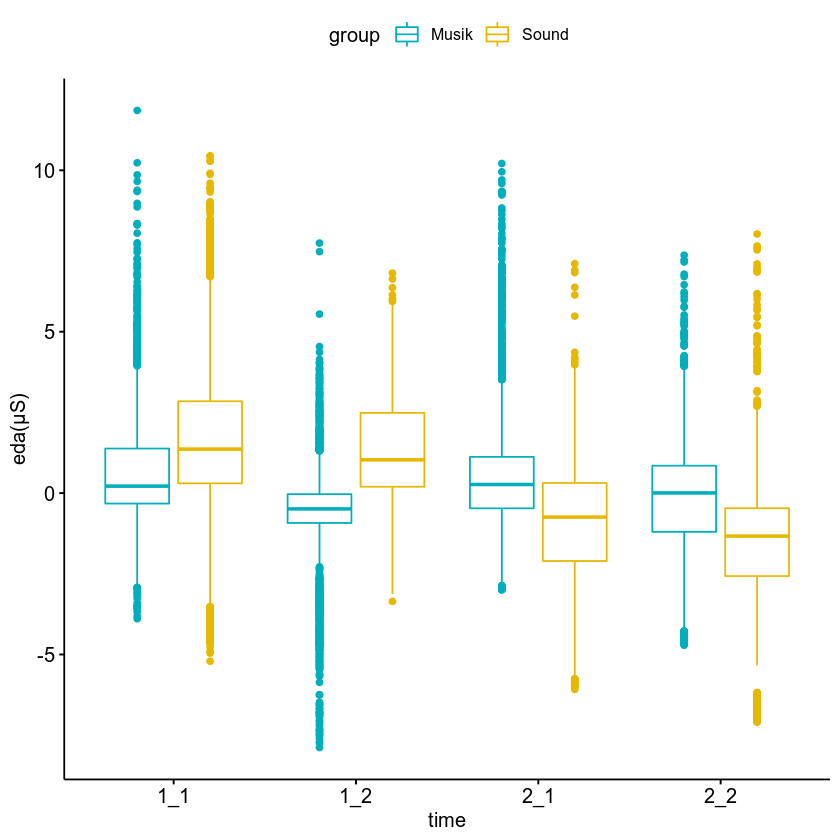

In [32]:
p_groupxtime1 <- ggboxplot(
  d_long_new, x = "time", y = "eda" ,ylab= "eda(μS)", 
  color = "group", palette = c("#00AFBB", "#E7B800")
)
p_groupxtime

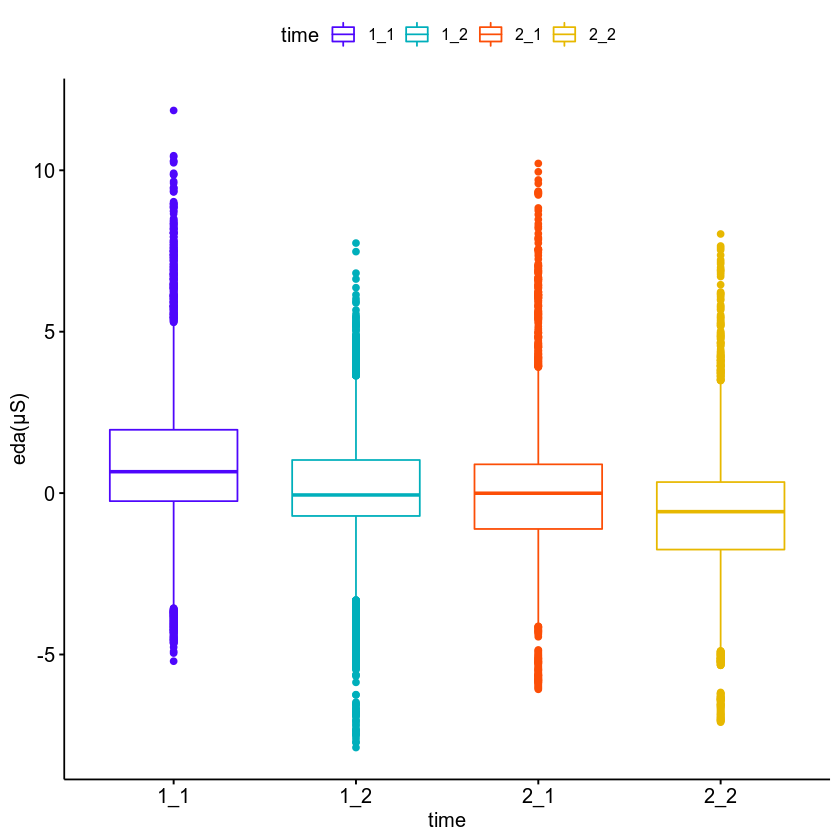

In [33]:
p_groupxtime2 <- ggboxplot(
  d_long_new, x = "time", y = "eda", ylab= "eda(μS)", 
  palette = c("#4e07fc","#00AFBB", "#FC4E07", "#E7B800" ), color = "time", shape = "time"
)
p_groupxtime3


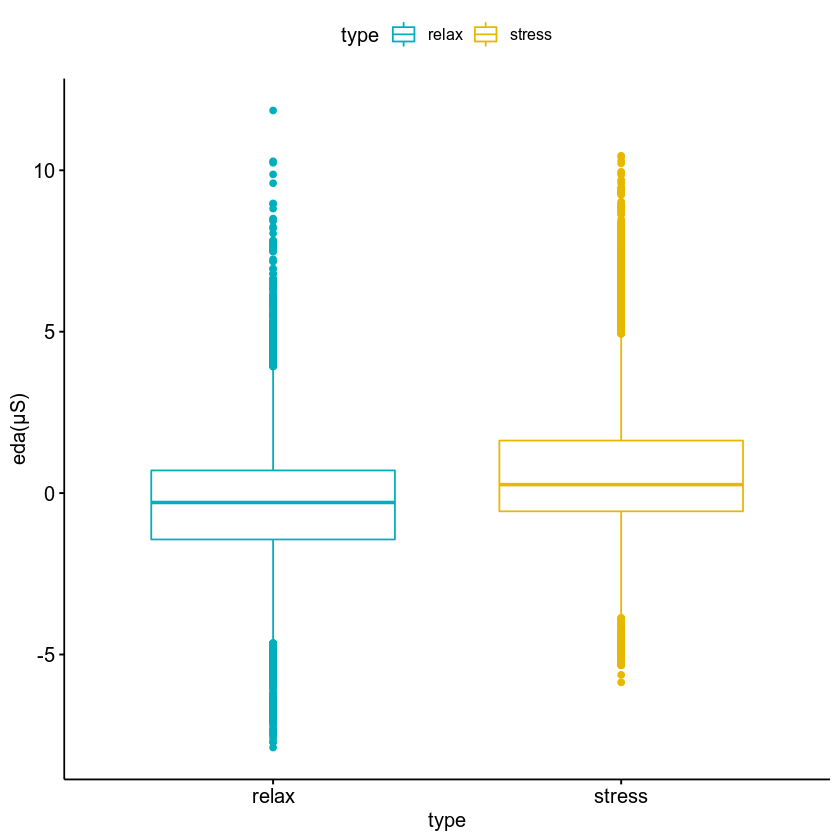

In [34]:
p_groupxtime3 <- ggboxplot(
  d_long_new, x = "type", y = "eda", ylab= "eda(μS)", 
  palette = c("#00AFBB", "#E7B800"), color = "type", shape = "type"
)
p_groupxtime4

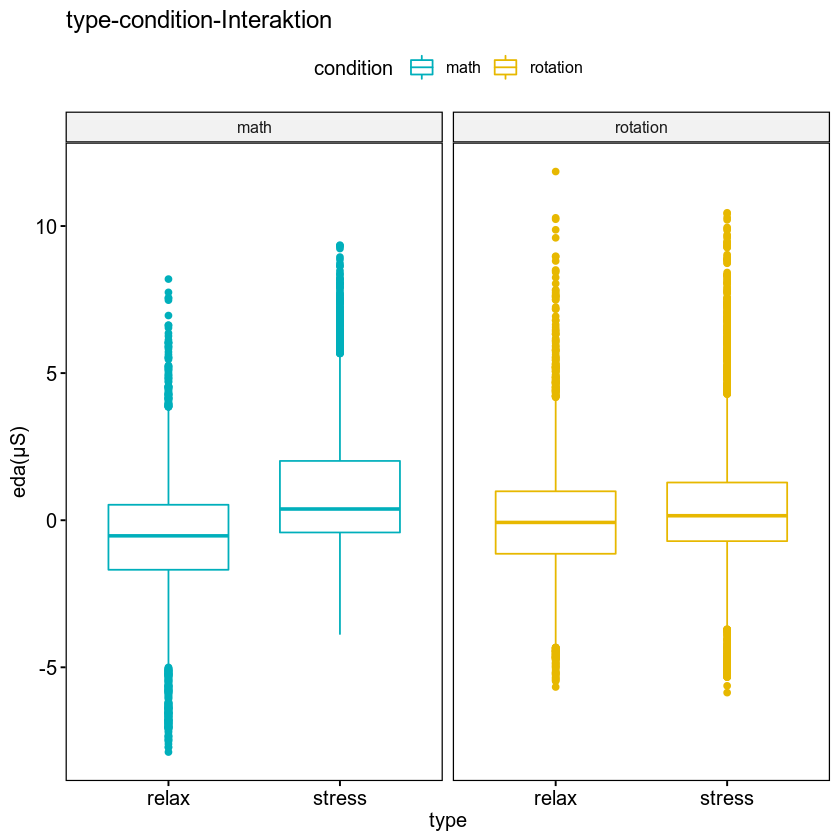

In [35]:
p_groupxtime4  <- ggboxplot(
  d_long_new, x = "type", y = "eda", facet.by = "condition", ylab= "eda(μS)", 
  color = "condition", palette = c("#00AFBB", "#E7B800"), title = "type-condition-Interaktion",
)
p_timextype6

In [37]:
# PNG device
png("plot1.png")
plot(p_groupxtime1)
dev.off()

png("plot2.png")
plot(p_groupxtime2)
dev.off()

png("plot3.png")
plot(p_groupxtime3)
dev.off()

png("plot4.png")
plot(p_groupxtime4)
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2